# Exploratory Data Analysis - UNSW-NB15 Dataset

This notebook performs comprehensive exploratory data analysis on all CSV files in the data directory.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load All Data Files

In [3]:
# Define data directory path
data_dir = Path('../data')

# List all CSV files
csv_files = list(data_dir.glob('*.csv'))
print(f"Found {len(csv_files)} CSV files:")
for file in csv_files:
    print(f"  - {file.name}")

Found 8 CSV files:
  - UNSW_NB15_training-set.csv
  - UNSW-NB15_LIST_EVENTS.csv
  - UNSW-NB15_2.csv
  - NUSW-NB15_features.csv
  - UNSW-NB15_1.csv
  - UNSW_NB15_testing-set.csv
  - UNSW-NB15_3.csv
  - UNSW-NB15_4.csv


## 2. Features Dataset Analysis

In [4]:
# Load features dataset
features_file = data_dir / 'NUSW-NB15_features.csv'
if features_file.exists():
    df_features = pd.read_csv(features_file, encoding='latin1')
    print("Features Dataset Shape:", df_features.shape)
    print("\nFirst few rows:")
    display(df_features.head())
    print("\nDataset Info:")
    df_features.info()
    print("\nSummary Statistics:")
    display(df_features.describe())
else:
    print("Features file not found")

Features Dataset Shape: (49, 4)

First few rows:


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB

Summary Statistics:


,No.
count,49.00000
mean,25.00000
std,14.28869
min,1.00000
25%,13.00000
50%,25.00000
75%,37.00000
max,49.00000


## 3. Training Set Analysis

In [5]:
# Load training dataset
train_file = data_dir / 'UNSW_NB15_training-set.csv'
if train_file.exists():
    df_train = pd.read_csv(train_file)
    print("Training Dataset Shape:", df_train.shape)
    print("\nFirst few rows:")
    display(df_train.head())
    print("\nColumn Names:")
    print(df_train.columns.tolist())
    print("\nData Types:")
    display(df_train.dtypes)
    print("\nMissing Values:")
    missing = df_train.isnull().sum()
    if missing.sum() > 0:
        display(missing[missing > 0])
    else:
        print("No missing values found")
    print("\nSummary Statistics:")
    display(df_train.describe())
else:
    print("Training file not found")

Training Dataset Shape: (82332, 45)

First few rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0



Column Names:
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Data Types:


id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l


Missing Values:
No missing values found

Summary Statistics:


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000



attack_cat Distribution:
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


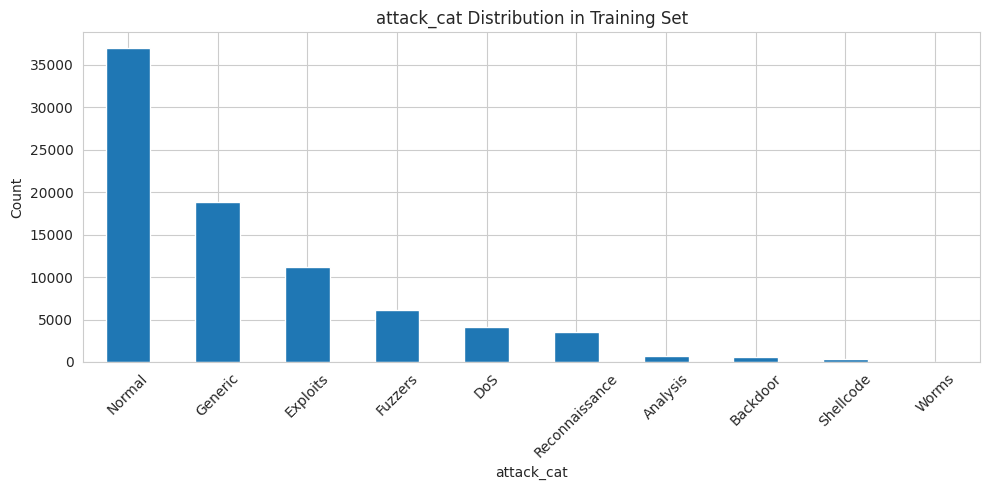


label Distribution:
label
1    45332
0    37000
Name: count, dtype: int64


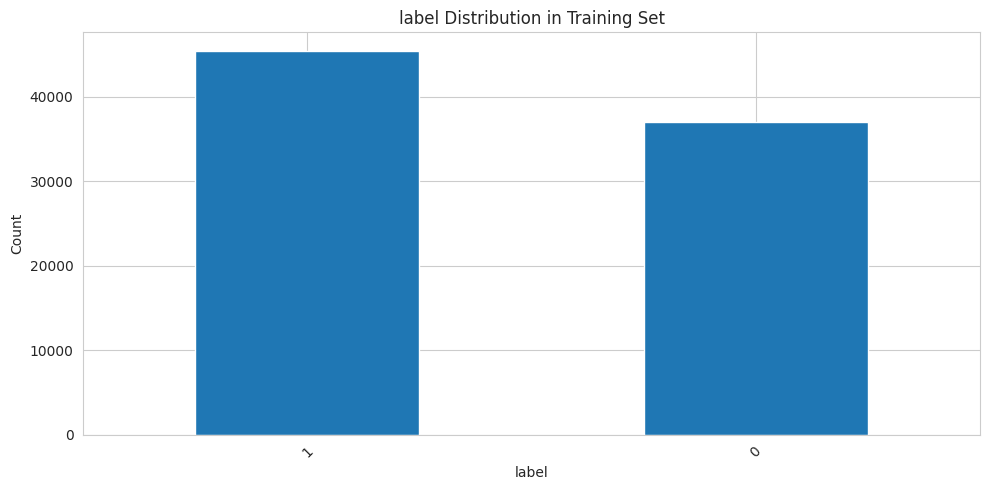

In [6]:
# Analyze target variable distribution in training set
if 'df_train' in locals():
    # Check for label/attack columns
    label_cols = [col for col in df_train.columns if 'label' in col.lower() or 'attack' in col.lower()]
    
    if label_cols:
        for col in label_cols:
            print(f"\n{col} Distribution:")
            print(df_train[col].value_counts())
            
            # Visualization
            plt.figure(figsize=(10, 5))
            df_train[col].value_counts().plot(kind='bar')
            plt.title(f'{col} Distribution in Training Set')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

## 4. Testing Set Analysis

In [7]:
# Load testing dataset
test_file = data_dir / 'UNSW_NB15_testing-set.csv'
if test_file.exists():
    df_test = pd.read_csv(test_file)
    print("Testing Dataset Shape:", df_test.shape)
    print("\nFirst few rows:")
    display(df_test.head())
    print("\nColumn Names:")
    print(df_test.columns.tolist())
    print("\nMissing Values:")
    missing = df_test.isnull().sum()
    if missing.sum() > 0:
        display(missing[missing > 0])
    else:
        print("No missing values found")
    print("\nSummary Statistics:")
    display(df_test.describe())
else:
    print("Testing file not found")

Testing Dataset Shape: (175341, 45)

First few rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0



Column Names:
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

Missing Values:
No missing values found

Summary Statistics:


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000



attack_cat Distribution:
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


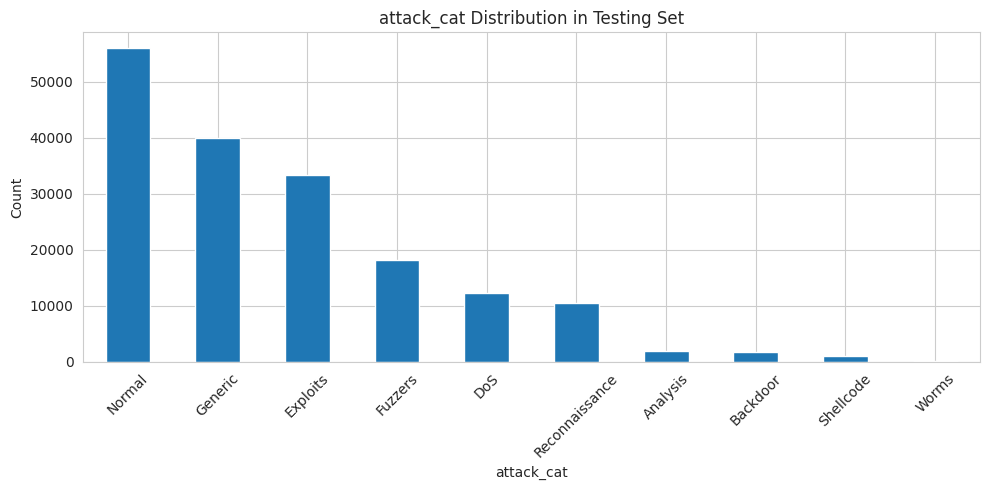


label Distribution:
label
1    119341
0     56000
Name: count, dtype: int64


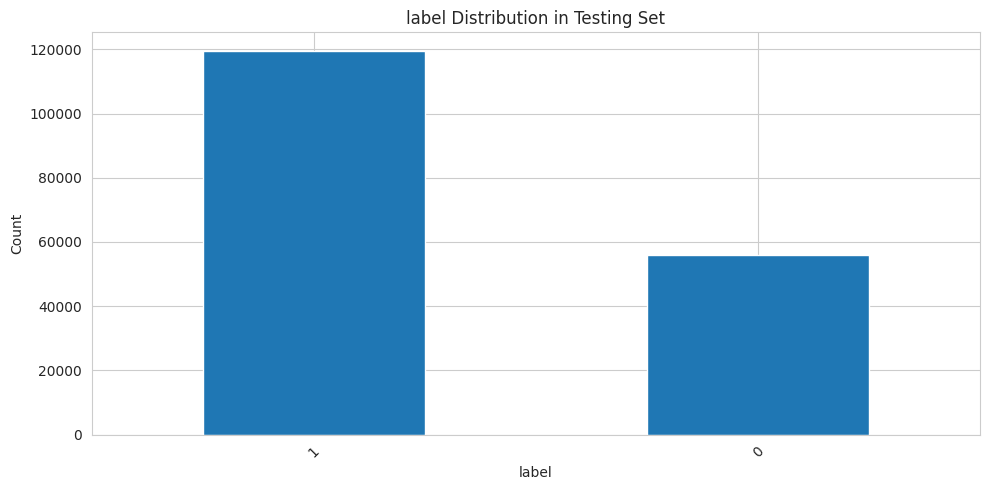

In [8]:
# Analyze target variable distribution in testing set
if 'df_test' in locals():
    label_cols = [col for col in df_test.columns if 'label' in col.lower() or 'attack' in col.lower()]
    
    if label_cols:
        for col in label_cols:
            print(f"\n{col} Distribution:")
            print(df_test[col].value_counts())
            
            # Visualization
            plt.figure(figsize=(10, 5))
            df_test[col].value_counts().plot(kind='bar')
            plt.title(f'{col} Distribution in Testing Set')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

## 5. UNSW-NB15 Partition Files (1-4) Analysis

In [9]:
# Load and analyze partition files
partition_files = [data_dir / f'UNSW-NB15_{i}.csv' for i in range(1, 5)]
partition_dfs = {}

for i, file in enumerate(partition_files, 1):
    if file.exists():
        print(f"\n{'='*60}")
        print(f"UNSW-NB15_{i}.csv Analysis")
        print(f"{'='*60}")
        
        df = pd.read_csv(file)
        partition_dfs[f'part_{i}'] = df
        
        print(f"Shape: {df.shape}")
        print(f"\nFirst few rows:")
        display(df.head())
        print(f"\nColumn Names ({len(df.columns)} columns):")
        print(df.columns.tolist())
        print(f"\nData Types:")
        display(df.dtypes.value_counts())
        print(f"\nMissing Values:")
        missing = df.isnull().sum()
        if missing.sum() > 0:
            display(missing[missing > 0])
        else:
            print("No missing values found")
    else:
        print(f"File UNSW-NB15_{i}.csv not found")


UNSW-NB15_1.csv Analysis
Shape: (700000, 49)

First few rows:


,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0



Column Names (49 columns):
['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055', '132', '164', '31', '29', '0', '0.1', 'dns', '500473.9375', '621800.9375', '2', '2.1', '0.2', '0.3', '0.4', '0.5', '66', '82', '0.6', '0.7', '0.8', '0.9', '1421927414', '1421927414.1', '0.017', '0.013', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '3', '7', '1', '3.1', '1.1', '1.2', '1.3', 'Unnamed: 47', '0.18']

Data Types:


int64      31
float64    10
object      8
Name: count, dtype: int64


Missing Values:


Unnamed: 47    677785
dtype: int64


UNSW-NB15_2.csv Analysis
Shape: (700000, 49)

First few rows:


,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0.6,13,13.1,6,7.1,1,1.1,2,Unnamed: 47,0.7
0,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1,1,2,7,5,1,1,4,NaN,0
2,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0,13,13,6,7,1,1,2,NaN,0
3,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0,8,20,7,5,1,1,4,NaN,0
4,59.166.0.8,39094,149.171.126.3,53,udp,CON,0.001026,130,162,31,...,0,8,13,6,5,1,1,1,NaN,0



Column Names (49 columns):
['59.166.0.0', '6055', '149.171.126.5', '54145', 'tcp', 'FIN', '0.072974', '4238', '60788', '31', '29', '7', '30', '-', '458245.4375', '6571546.5', '72', '72.1', '255', '255.1', '1003293149', '1003585034', '59', '844', '0', '0.1', '62.04531', '61.899776', '1421955842', '1421955842.1', '1.02269', '0.997042', '0.002317', '0.002173', '0.000144', '0.2', '0.3', '0.4', '0.5', '0.6', '13', '13.1', '6', '7.1', '1', '1.1', '2', 'Unnamed: 47', '0.7']

Data Types:


int64      29
float64    12
object      8
Name: count, dtype: int64


Missing Values:


0.4            285256
0.5            307038
Unnamed: 47    647251
dtype: int64


UNSW-NB15_3.csv Analysis
Shape: (700000, 49)

First few rows:


,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2.1,5,1,1.1,2.2,Unnamed: 47,0.4
0,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
1,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,59.166.0.3,10275,149.171.126.0,25,tcp,FIN,0.486578,37462,3380,31,...,,3,2,3,4,2,1,2,NaN,0



Column Names (49 columns):
['59.166.0.1', '18247', '149.171.126.4', '7662', 'tcp', 'FIN', '0.119596', '4550', '68342', '31', '29', '7', '33', '-', '300478.2813', '4514398.5', '78', '80', '255', '255.1', '1818376620', '1818657356', '58', '854', '0', '0.1', '87.137592', '85.643619', '1424231129', '1424231129.1', '1.549156', '1.50719', '0.000644', '0.000521', '0.000123', '0.2', '0.3', 'Unnamed: 37', 'Unnamed: 38', ' ', '6', '2', '2.1', '5', '1', '1.1', '2.2', 'Unnamed: 47', '0.4']

Data Types:


int64      29
float64    12
object      8
Name: count, dtype: int64


Missing Values:


Unnamed: 37    656404
Unnamed: 38    689428
Unnamed: 47    542575
dtype: int64


UNSW-NB15_4.csv Analysis
Shape: (440043, 49)

First few rows:


,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,...,,9,7,2,3,2,1,6,NaN,0



Column Names (49 columns):
['59.166.0.9', '7045', '149.171.126.7', '25', 'tcp', 'FIN', '0.201886', '37552', '3380', '31', '29', '18', '8', 'smtp', '1459437.5', '130766.8672', '52', '42', '255', '255.1', '1422136554', '3572668484', '722', '80', '0', '0.1', '456.043567', '15.530109', '1424250009', '1424250009.1', '3.943843', '4.912488', '0.00059', '0.000473', '0.000117', '0.2', '0.3', 'Unnamed: 37', 'Unnamed: 38', ' ', '2', '2.1', '7', '4', '1', '1.1', '3', 'Unnamed: 47', '0.4']

Data Types:


int64      29
float64    12
object      8
Name: count, dtype: int64


Missing Values:


Unnamed: 37    406483
Unnamed: 38    433411
Unnamed: 47    351149
dtype: int64

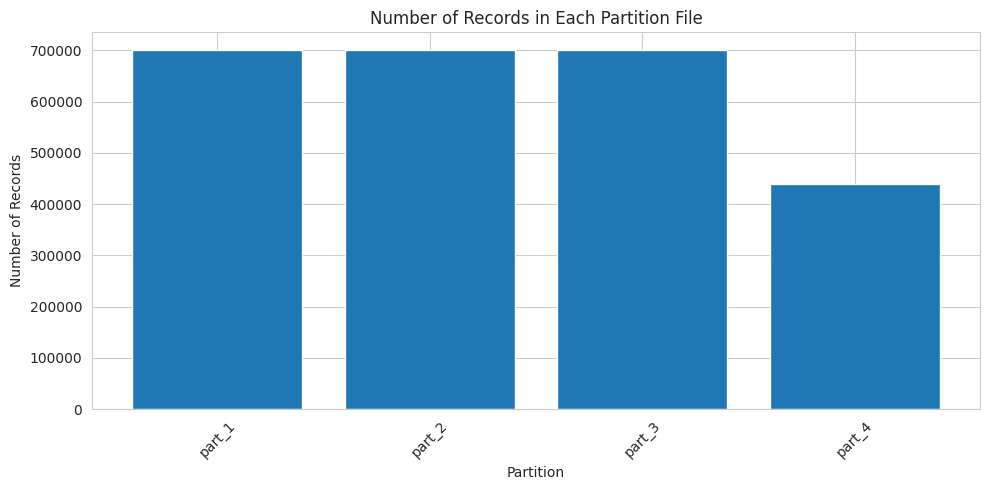


Total records across all partitions: 2540043


In [10]:
# Compare partition file sizes
if partition_dfs:
    partition_sizes = {name: df.shape[0] for name, df in partition_dfs.items()}
    
    plt.figure(figsize=(10, 5))
    plt.bar(partition_sizes.keys(), partition_sizes.values())
    plt.title('Number of Records in Each Partition File')
    plt.xlabel('Partition')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nTotal records across all partitions:", sum(partition_sizes.values()))

## 6. List Events Analysis

In [11]:
# Load list events dataset
events_file = data_dir / 'UNSW-NB15_LIST_EVENTS.csv'
if events_file.exists():
    df_events = pd.read_csv(events_file)
    print("List Events Dataset Shape:", df_events.shape)
    print("\nFirst few rows:")
    display(df_events.head())
    print("\nAll Events:")
    display(df_events)
    print("\nDataset Info:")
    df_events.info()
else:
    print("List events file not found")

List Events Dataset Shape: (208, 3)

First few rows:


,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245



All Events:


,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245
...,...,...,...
203,Shellcode,Decoders,18
204,Shellcode,Multiple OS,10
205,Shellcode,Solaris,12
206,Worms,,174



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attack category     207 non-null    object
 1   Attack subcategory  207 non-null    object
 2   Number of events    208 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


## 7. Correlation Analysis (Training Set)

Analyzing correlations for 41 numerical features


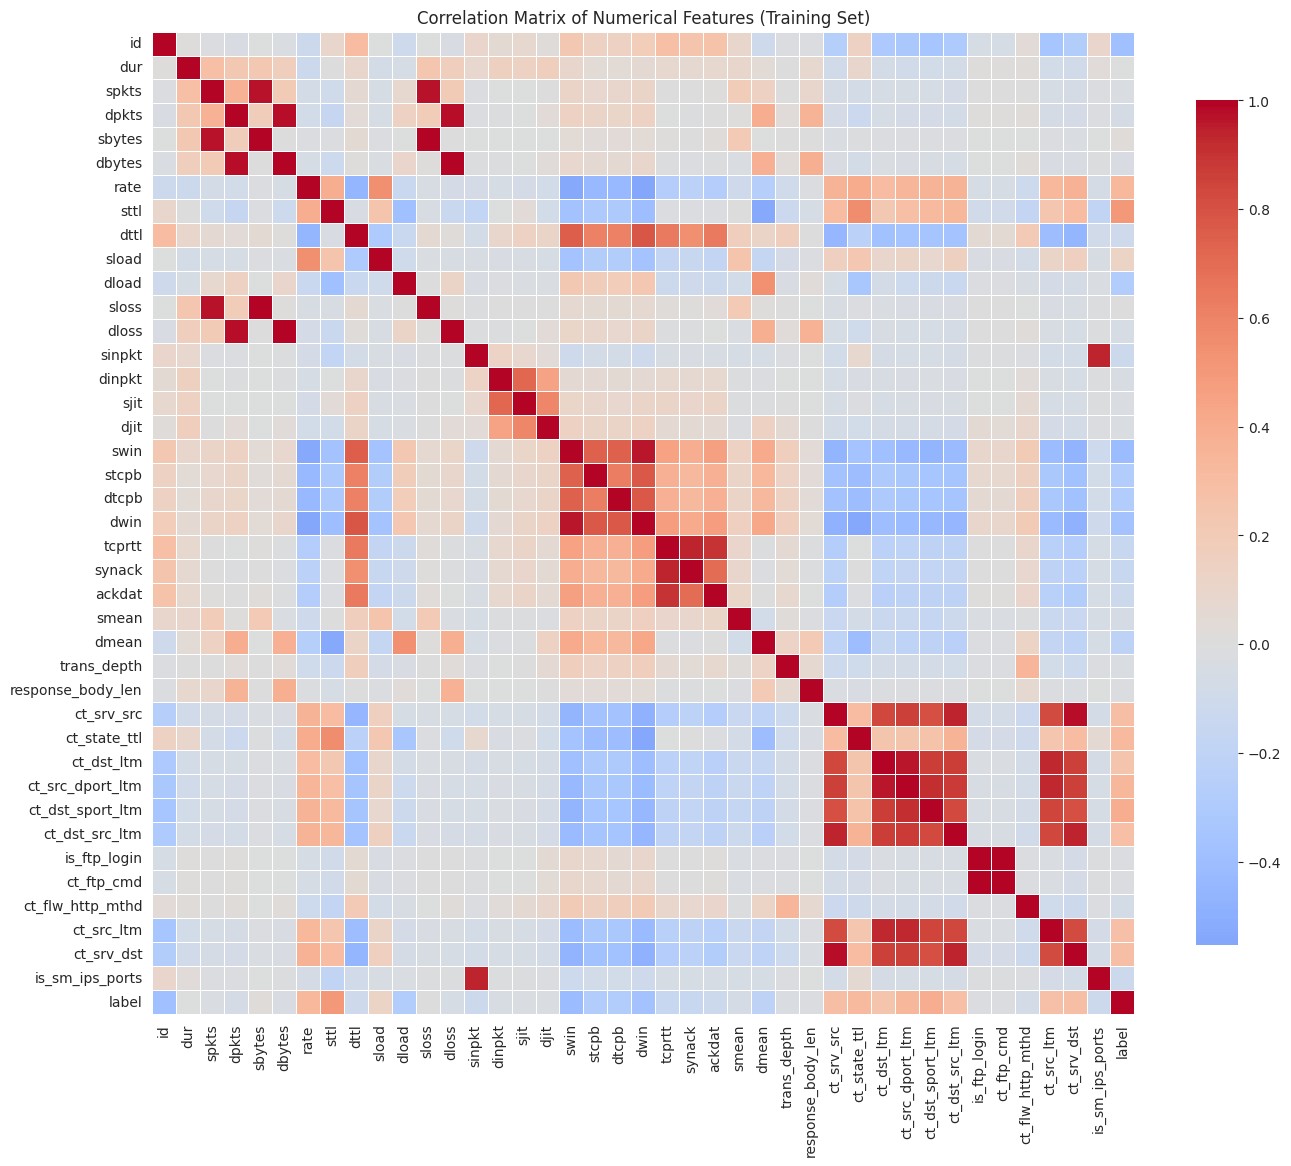


Highly Correlated Feature Pairs (|correlation| > 0.8):
  spkts <-> sbytes: 0.966
  spkts <-> sloss: 0.974
  dpkts <-> dbytes: 0.976
  dpkts <-> dloss: 0.982
  sbytes <-> sloss: 0.995
  dbytes <-> dloss: 0.997
  sinpkt <-> is_sm_ips_ports: 0.945
  swin <-> dwin: 0.960
  tcprtt <-> synack: 0.939
  tcprtt <-> ackdat: 0.898
  ct_srv_src <-> ct_dst_ltm: 0.842
  ct_srv_src <-> ct_src_dport_ltm: 0.855
  ct_srv_src <-> ct_dst_sport_ltm: 0.801
  ct_srv_src <-> ct_dst_src_ltm: 0.934
  ct_srv_src <-> ct_src_ltm: 0.822
  ct_srv_src <-> ct_srv_dst: 0.978
  ct_dst_ltm <-> ct_src_dport_ltm: 0.960
  ct_dst_ltm <-> ct_dst_sport_ltm: 0.872
  ct_dst_ltm <-> ct_dst_src_ltm: 0.868
  ct_dst_ltm <-> ct_src_ltm: 0.932
  ct_dst_ltm <-> ct_srv_dst: 0.855
  ct_src_dport_ltm <-> ct_dst_sport_ltm: 0.912
  ct_src_dport_ltm <-> ct_dst_src_ltm: 0.876
  ct_src_dport_ltm <-> ct_src_ltm: 0.933
  ct_src_dport_ltm <-> ct_srv_dst: 0.864
  ct_dst_sport_ltm <-> ct_dst_src_ltm: 0.831
  ct_dst_sport_ltm <-> ct_src_ltm: 0.847


In [12]:
# Correlation analysis for numerical features in training set
if 'df_train' in locals():
    # Select only numerical columns
    numerical_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numerical_cols) > 1:
        print(f"Analyzing correlations for {len(numerical_cols)} numerical features")
        
        # Calculate correlation matrix
        corr_matrix = df_train[numerical_cols].corr()
        
        # Plot correlation heatmap
        plt.figure(figsize=(14, 12))
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
                    square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Matrix of Numerical Features (Training Set)')
        plt.tight_layout()
        plt.show()
        
        # Find highly correlated pairs
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) > 0.8:
                    high_corr_pairs.append((
                        corr_matrix.columns[i],
                        corr_matrix.columns[j],
                        corr_matrix.iloc[i, j]
                    ))
        
        if high_corr_pairs:
            print("\nHighly Correlated Feature Pairs (|correlation| > 0.8):")
            for feat1, feat2, corr in high_corr_pairs:
                print(f"  {feat1} <-> {feat2}: {corr:.3f}")
        else:
            print("\nNo highly correlated pairs found (|correlation| > 0.8)")

## 8. Data Distribution Analysis

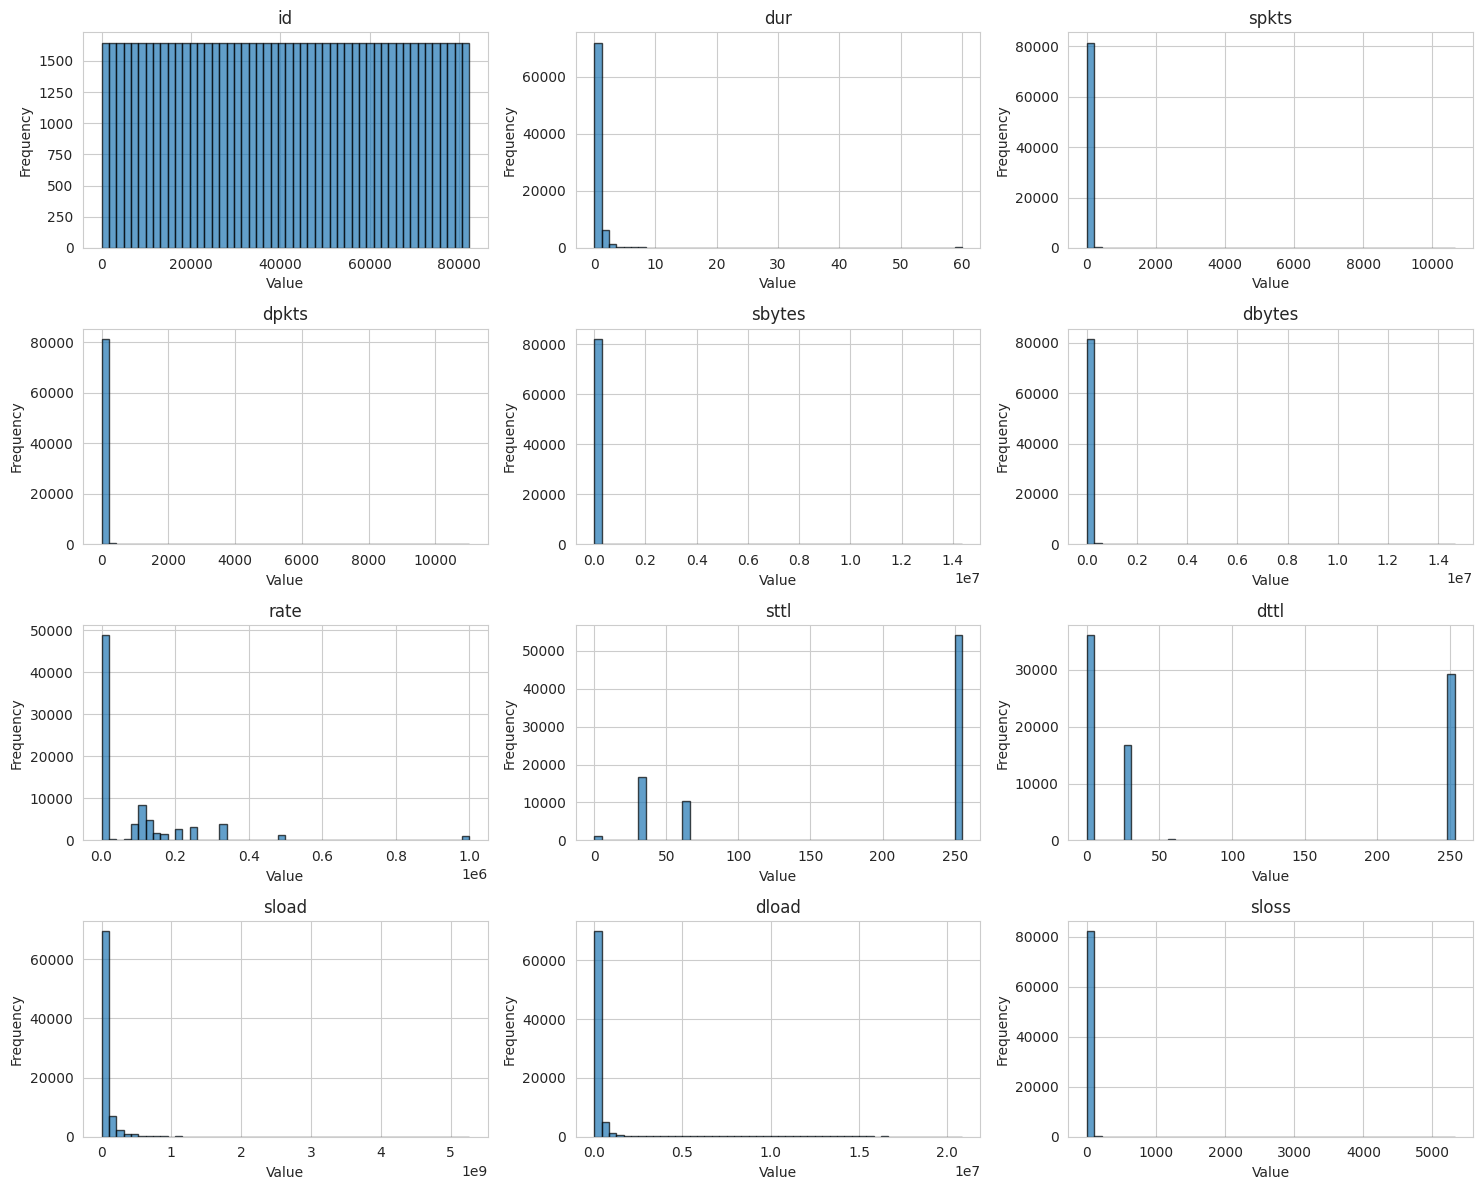


Showing distributions for first 12 numerical features
Total numerical features: 41


In [13]:
# Analyze numerical feature distributions
if 'df_train' in locals():
    numerical_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
    
    # Plot distributions for first 12 numerical features
    cols_to_plot = numerical_cols[:12]
    
    if cols_to_plot:
        fig, axes = plt.subplots(4, 3, figsize=(15, 12))
        axes = axes.ravel()
        
        for idx, col in enumerate(cols_to_plot):
            axes[idx].hist(df_train[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{col}')
            axes[idx].set_xlabel('Value')
            axes[idx].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
        print(f"\nShowing distributions for first {len(cols_to_plot)} numerical features")
        print(f"Total numerical features: {len(numerical_cols)}")

## 9. Categorical Features Analysis

Found 4 categorical features:
['proto', 'service', 'state', 'attack_cat']

Feature: proto
Unique values: 131

Top 10 values:
proto
tcp     43095
udp     29418
unas     3515
arp       987
ospf      676
sctp      324
any        96
gre        88
rsvp       64
ipv6       61
Name: count, dtype: int64

Feature: service
Unique values: 13

Top 10 values:
service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
Name: count, dtype: int64


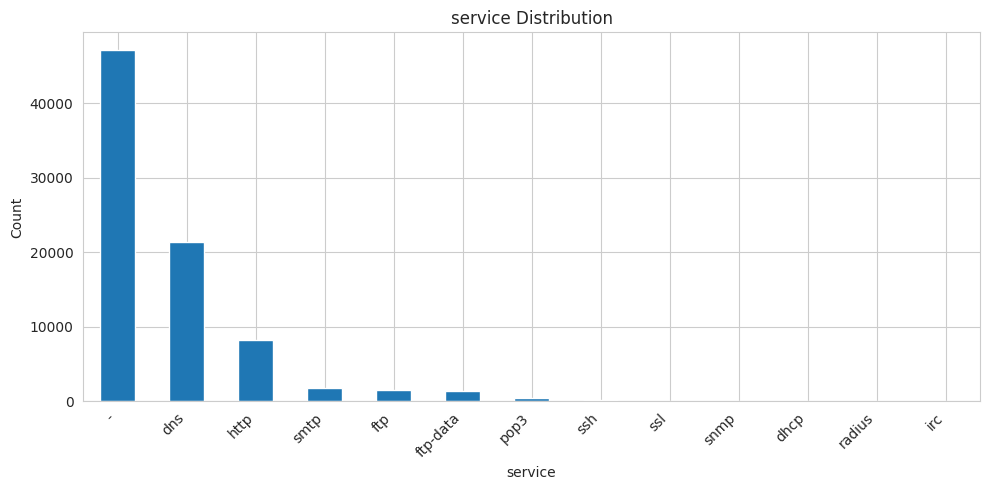


Feature: state
Unique values: 7

Top 10 values:
state
FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: count, dtype: int64


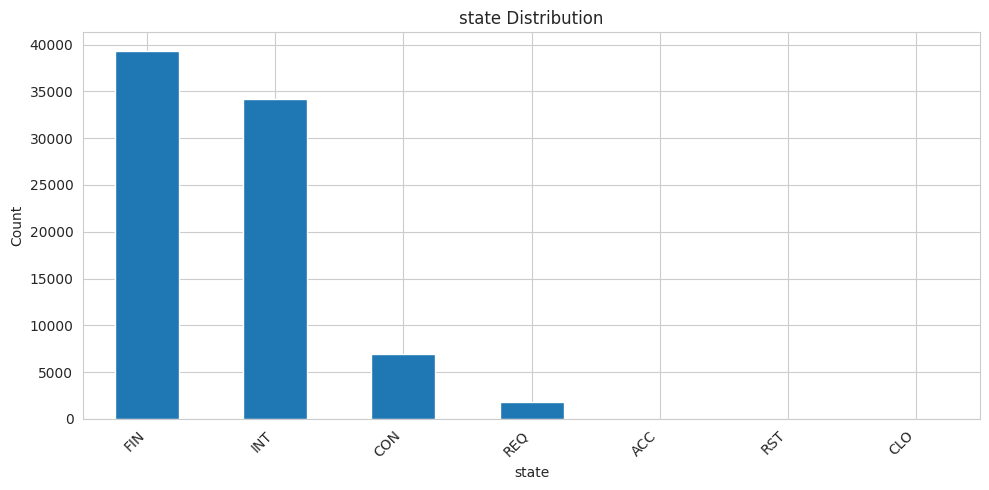


Feature: attack_cat
Unique values: 10

Top 10 values:
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


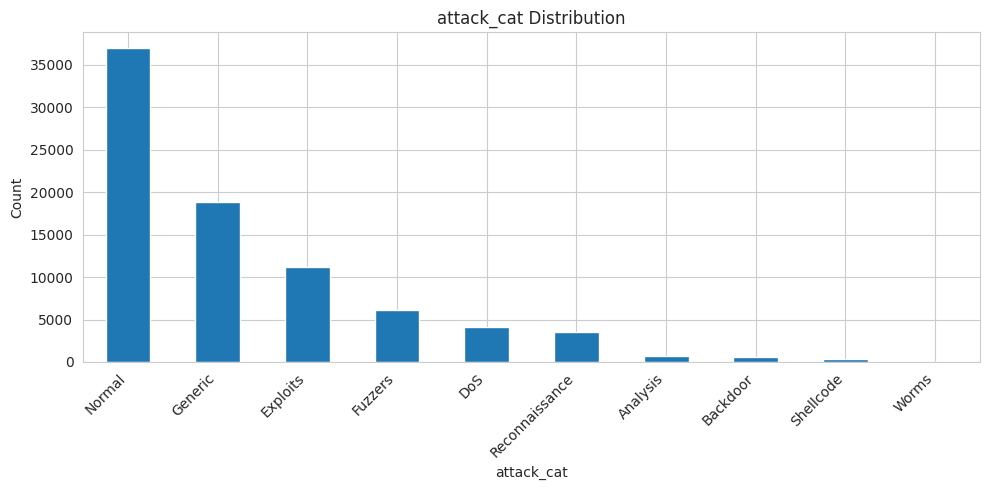

In [14]:
# Analyze categorical features
if 'df_train' in locals():
    categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
    
    if categorical_cols:
        print(f"Found {len(categorical_cols)} categorical features:")
        print(categorical_cols)
        
        for col in categorical_cols:
            print(f"\n{'='*60}")
            print(f"Feature: {col}")
            print(f"{'='*60}")
            value_counts = df_train[col].value_counts()
            print(f"Unique values: {len(value_counts)}")
            print("\nTop 10 values:")
            print(value_counts.head(10))
            
            # Plot if reasonable number of unique values
            if len(value_counts) <= 20:
                plt.figure(figsize=(10, 5))
                value_counts.plot(kind='bar')
                plt.title(f'{col} Distribution')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
    else:
        print("No categorical features found")

## 10. Summary Statistics Comparison

In [15]:
# Compare train and test datasets
if 'df_train' in locals() and 'df_test' in locals():
    print("Dataset Comparison:")
    print(f"\nTraining Set:")
    print(f"  Rows: {df_train.shape[0]:,}")
    print(f"  Columns: {df_train.shape[1]}")
    
    print(f"\nTesting Set:")
    print(f"  Rows: {df_test.shape[0]:,}")
    print(f"  Columns: {df_test.shape[1]}")
    
    # Check if columns match
    train_cols = set(df_train.columns)
    test_cols = set(df_test.columns)
    
    if train_cols == test_cols:
        print("\n✓ Training and testing sets have the same columns")
    else:
        print("\n✗ Training and testing sets have different columns")
        if train_cols - test_cols:
            print(f"  Columns in training but not in testing: {train_cols - test_cols}")
        if test_cols - train_cols:
            print(f"  Columns in testing but not in training: {test_cols - train_cols}")

Dataset Comparison:

Training Set:
  Rows: 82,332
  Columns: 45

Testing Set:
  Rows: 175,341
  Columns: 45

✓ Training and testing sets have the same columns


## 11. Data Quality Check

In [16]:
# Check for duplicates and other data quality issues
datasets = {}
if 'df_train' in locals():
    datasets['Training'] = df_train
if 'df_test' in locals():
    datasets['Testing'] = df_test

for name, df in datasets.items():
    print(f"\n{'='*60}")
    print(f"{name} Set Data Quality")
    print(f"{'='*60}")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    # Missing values
    missing_total = df.isnull().sum().sum()
    missing_pct = missing_total / (df.shape[0] * df.shape[1]) * 100
    print(f"Missing values: {missing_total} ({missing_pct:.2f}%)")
    
    # Data types
    print(f"\nData type distribution:")
    print(df.dtypes.value_counts())
    
    # Memory usage
    memory_mb = df.memory_usage(deep=True).sum() / 1024**2
    print(f"\nMemory usage: {memory_mb:.2f} MB")


Training Set Data Quality
Duplicate rows: 0 (0.00%)
Missing values: 0 (0.00%)

Data type distribution:
int64      30
float64    11
object      4
Name: count, dtype: int64

Memory usage: 42.32 MB

Testing Set Data Quality
Duplicate rows: 0 (0.00%)
Missing values: 0 (0.00%)

Data type distribution:
int64      30
float64    11
object      4
Name: count, dtype: int64

Memory usage: 90.21 MB


## 12. Export Summary Report

In [17]:
# Create summary report
summary_report = []
summary_report.append("UNSW-NB15 Dataset EDA Summary Report")
summary_report.append("="*60)
summary_report.append(f"\nGenerated: {pd.Timestamp.now()}")
summary_report.append(f"\nTotal CSV files analyzed: {len(csv_files)}")

for file in csv_files:
    summary_report.append(f"\n- {file.name}")

if 'df_train' in locals():
    summary_report.append(f"\nTraining Set: {df_train.shape[0]:,} rows × {df_train.shape[1]} columns")

if 'df_test' in locals():
    summary_report.append(f"Testing Set: {df_test.shape[0]:,} rows × {df_test.shape[1]} columns")

if partition_dfs:
    total_partition_rows = sum(df.shape[0] for df in partition_dfs.values())
    summary_report.append(f"\nTotal Partition Files Records: {total_partition_rows:,}")

summary_text = "\n".join(summary_report)
print(summary_text)

# Save report to file
with open('eda_summary_report.txt', 'w') as f:
    f.write(summary_text)
    
print("\n✓ Summary report saved to 'eda_summary_report.txt'")

UNSW-NB15 Dataset EDA Summary Report

Generated: 2025-11-08 09:47:36.082882

Total CSV files analyzed: 8

- UNSW_NB15_training-set.csv

- UNSW-NB15_LIST_EVENTS.csv

- UNSW-NB15_2.csv

- NUSW-NB15_features.csv

- UNSW-NB15_1.csv

- UNSW_NB15_testing-set.csv

- UNSW-NB15_3.csv

- UNSW-NB15_4.csv

Training Set: 82,332 rows × 45 columns
Testing Set: 175,341 rows × 45 columns

Total Partition Files Records: 2,540,043

✓ Summary report saved to 'eda_summary_report.txt'


## 13. Comprehensive Analysis Report & Classification Method Recommendations

In [18]:
# Generate comprehensive analysis report
print("="*80)
print("COMPREHENSIVE EDA ANALYSIS REPORT - UNSW-NB15 DATASET")
print("="*80)
print(f"\nGenerated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n" + "="*80)
print("1. DATASET OVERVIEW")
print("="*80)

# Dataset sizes
if 'df_train' in locals() and 'df_test' in locals():
    print(f"\n📊 Training Set:")
    print(f"   - Samples: {df_train.shape[0]:,}")
    print(f"   - Features: {df_train.shape[1]}")
    print(f"   - Memory: {df_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print(f"\n📊 Testing Set:")
    print(f"   - Samples: {df_test.shape[0]:,}")
    print(f"   - Features: {df_test.shape[1]}")
    print(f"   - Memory: {df_test.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print(f"\n📊 Total Dataset:")
    print(f"   - Total Samples: {df_train.shape[0] + df_test.shape[0]:,}")
    print(f"   - Train/Test Split: {df_train.shape[0]/(df_train.shape[0] + df_test.shape[0])*100:.1f}% / {df_test.shape[0]/(df_train.shape[0] + df_test.shape[0])*100:.1f}%")

print("\n" + "="*80)
print("2. FEATURE ANALYSIS")
print("="*80)

if 'df_train' in locals():
    numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\n🔢 Numerical Features: {len(numerical_features)}")
    print(f"   {', '.join(numerical_features[:10])}...")
    
    print(f"\n📝 Categorical Features: {len(categorical_features)}")
    for feat in categorical_features:
        unique_count = df_train[feat].nunique()
        print(f"   - {feat}: {unique_count} unique values")

print("\n" + "="*80)
print("3. TARGET VARIABLE ANALYSIS")
print("="*80)

if 'df_train' in locals():
    # Binary classification
    print("\n🎯 Binary Classification (label):")
    label_dist = df_train['label'].value_counts()
    for label, count in label_dist.items():
        label_name = "Attack" if label == 1 else "Normal"
        pct = count / len(df_train) * 100
        print(f"   - {label_name} (label={label}): {count:,} ({pct:.2f}%)")
    
    # Calculate imbalance ratio
    imbalance_ratio = label_dist.max() / label_dist.min()
    print(f"   - Imbalance Ratio: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 1.5:
        print(f"   ⚠️  Moderate class imbalance detected")
    
    # Multi-class classification
    if 'attack_cat' in df_train.columns:
        print("\n🎯 Multi-class Classification (attack_cat):")
        attack_dist = df_train['attack_cat'].value_counts()
        print(f"   - Number of classes: {len(attack_dist)}")
        print(f"\n   Class Distribution:")
        for attack, count in attack_dist.items():
            pct = count / len(df_train) * 100
            print(f"      • {attack:20s}: {count:6,} ({pct:5.2f}%)")
        
        # Check for severe imbalance
        max_class = attack_dist.max()
        min_class = attack_dist.min()
        multi_imbalance = max_class / min_class
        print(f"\n   - Imbalance Ratio: {multi_imbalance:.2f}:1")
        
        if multi_imbalance > 10:
            print(f"   ⚠️  Severe class imbalance detected (>10:1)")
            print(f"   📌 Recommendation: Use class balancing techniques")

COMPREHENSIVE EDA ANALYSIS REPORT - UNSW-NB15 DATASET

Generated: 2025-11-08 10:05:07

1. DATASET OVERVIEW

📊 Training Set:
   - Samples: 82,332
   - Features: 45
   - Memory: 42.32 MB

📊 Testing Set:
   - Samples: 175,341
   - Features: 45
   - Memory: 90.21 MB

📊 Total Dataset:
   - Total Samples: 257,673
   - Train/Test Split: 32.0% / 68.0%

2. FEATURE ANALYSIS

🔢 Numerical Features: 41
   id, dur, spkts, dpkts, sbytes, dbytes, rate, sttl, dttl, sload...

📝 Categorical Features: 4
   - proto: 131 unique values
   - service: 13 unique values
   - state: 7 unique values
   - attack_cat: 10 unique values

3. TARGET VARIABLE ANALYSIS

🎯 Binary Classification (label):
   - Attack (label=1): 45,332 (55.06%)
   - Normal (label=0): 37,000 (44.94%)
   - Imbalance Ratio: 1.23:1

🎯 Multi-class Classification (attack_cat):
   - Number of classes: 10

   Class Distribution:
      • Normal              : 37,000 (44.94%)
      • Generic             : 18,871 (22.92%)
      • Exploits            : 1

In [19]:
# Data quality analysis
print("\n" + "="*80)
print("4. DATA QUALITY ASSESSMENT")
print("="*80)

if 'df_train' in locals():
    # Missing values
    missing_count = df_train.isnull().sum().sum()
    print(f"\n✓ Missing Values: {missing_count} ({missing_count/(df_train.shape[0]*df_train.shape[1])*100:.3f}%)")
    
    # Duplicates
    duplicates = df_train.duplicated().sum()
    print(f"✓ Duplicate Rows: {duplicates} ({duplicates/len(df_train)*100:.2f}%)")
    
    # Data types distribution
    print(f"\n✓ Data Types Distribution:")
    dtype_counts = df_train.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   - {dtype}: {count} features")
    
    print(f"\n✓ Overall Data Quality: {'EXCELLENT' if missing_count == 0 and duplicates == 0 else 'GOOD'}")

print("\n" + "="*80)
print("5. FEATURE CHARACTERISTICS")
print("="*80)

if 'df_train' in locals():
    numerical_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
    
    # Exclude ID and label columns
    feature_cols = [col for col in numerical_cols if col not in ['id', 'label']]
    
    if feature_cols:
        # Calculate feature statistics
        feature_stats = df_train[feature_cols].describe()
        
        # Features with zero or near-zero variance
        low_variance = []
        for col in feature_cols:
            if df_train[col].std() < 0.01:
                low_variance.append(col)
        
        print(f"\n📊 Numerical Feature Statistics:")
        print(f"   - Total numerical features: {len(feature_cols)}")
        print(f"   - Features with low variance (<0.01): {len(low_variance)}")
        if low_variance:
            print(f"     • {', '.join(low_variance[:5])}")
        
        # Features with high skewness
        high_skew = []
        for col in feature_cols:
            skewness = df_train[col].skew()
            if abs(skewness) > 2:
                high_skew.append((col, skewness))
        
        print(f"\n   - Features with high skewness (|skew| > 2): {len(high_skew)}")
        if high_skew:
            print(f"     • Top 5 skewed features:")
            for col, skew in sorted(high_skew, key=lambda x: abs(x[1]), reverse=True)[:5]:
                print(f"       - {col}: {skew:.2f}")
        
        # Features with outliers (using IQR method)
        outlier_features = []
        for col in feature_cols:
            Q1 = df_train[col].quantile(0.25)
            Q3 = df_train[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df_train[col] < (Q1 - 1.5 * IQR)) | (df_train[col] > (Q3 + 1.5 * IQR))).sum()
            if outliers > 0:
                outlier_features.append((col, outliers, outliers/len(df_train)*100))
        
        print(f"\n   - Features with outliers (IQR method): {len(outlier_features)}")
        if outlier_features:
            print(f"     • Top 5 features with most outliers:")
            for col, count, pct in sorted(outlier_features, key=lambda x: x[1], reverse=True)[:5]:
                print(f"       - {col}: {count:,} ({pct:.2f}%)")

print("\n" + "="*80)
print("6. FEATURE CORRELATION INSIGHTS")
print("="*80)

if 'corr_matrix' in locals() and 'high_corr_pairs' in locals():
    print(f"\n🔗 Highly Correlated Feature Pairs (|correlation| > 0.8):")
    if high_corr_pairs:
        print(f"   - Found {len(high_corr_pairs)} highly correlated pairs")
        print(f"\n   Top 10 correlations:")
        for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]:
            print(f"      • {feat1} ↔ {feat2}: {corr:.3f}")
        print(f"\n   ⚠️  High correlation may indicate redundancy")
        print(f"   📌 Recommendation: Consider feature selection or dimensionality reduction")
    else:
        print(f"   ✓ No highly correlated pairs found")
        print(f"   ✓ Features are relatively independent")


4. DATA QUALITY ASSESSMENT

✓ Missing Values: 0 (0.000%)
✓ Duplicate Rows: 0 (0.00%)

✓ Data Types Distribution:
   - int64: 30 features
   - float64: 11 features
   - object: 4 features

✓ Overall Data Quality: EXCELLENT

5. FEATURE CHARACTERISTICS

📊 Numerical Feature Statistics:
   - Total numerical features: 39
   - Features with low variance (<0.01): 0

   - Features with high skewness (|skew| > 2): 30
     • Top 5 skewed features:
       - trans_depth: 170.79
       - response_body_len: 74.64
       - djit: 60.56
       - dloss: 54.47
       - sbytes: 53.78

   - Features with outliers (IQR method): 33
     • Top 5 features with most outliers:
       - dload: 18,112 (22.00%)
       - ct_dst_src_ltm: 12,789 (15.53%)
       - dbytes: 12,308 (14.95%)
       - smean: 11,928 (14.49%)
       - ct_src_dport_ltm: 11,476 (13.94%)

6. FEATURE CORRELATION INSIGHTS

🔗 Highly Correlated Feature Pairs (|correlation| > 0.8):
   - Found 32 highly correlated pairs

   Top 10 correlations:
      

### 13.1 Classification Method Recommendations

In [20]:
# Classification method recommendations based on EDA findings
print("="*80)
print("RECOMMENDED CLASSIFICATION METHODS FOR UNSW-NB15 DATASET")
print("="*80)

# Analyze dataset characteristics
if 'df_train' in locals():
    n_samples = df_train.shape[0]
    n_features = df_train.shape[1] - 1  # Excluding target
    n_classes_binary = df_train['label'].nunique()
    n_classes_multi = df_train['attack_cat'].nunique() if 'attack_cat' in df_train.columns else 0
    has_categorical = len(df_train.select_dtypes(include=['object']).columns) > 1
    
    print(f"\n📋 Dataset Characteristics Summary:")
    print(f"   • Sample size: {n_samples:,} (Medium to Large)")
    print(f"   • Number of features: {n_features}")
    print(f"   • Binary classes: {n_classes_binary}")
    print(f"   • Multi-class categories: {n_classes_multi}")
    print(f"   • Mixed data types: {has_categorical}")
    print(f"   • Class imbalance: Present")

print("\n" + "="*80)
print("RECOMMENDED ALGORITHMS (Priority Order)")
print("="*80)

recommendations = []

# Tier 1: Ensemble Methods (Highly Recommended)
print("\n🏆 TIER 1: ENSEMBLE METHODS (Highly Recommended)")
print("-" * 80)

print("\n1. Random Forest Classifier")
print("   Strengths:")
print("   ✓ Excellent for intrusion detection tasks")
print("   ✓ Handles mixed data types (numerical + categorical)")
print("   ✓ Robust to outliers and noise")
print("   ✓ Provides feature importance scores")
print("   ✓ No need for feature scaling")
print("   ✓ Reduces overfitting through averaging")
print("   Why for this dataset:")
print("   • Works well with 40+ features")
print("   • Can handle class imbalance with class_weight parameter")
print("   • Fast training and prediction")
print("   Implementation: sklearn.ensemble.RandomForestClassifier")

print("\n2. Gradient Boosting (XGBoost/LightGBM/CatBoost)")
print("   Strengths:")
print("   ✓ State-of-the-art performance on tabular data")
print("   ✓ Handles imbalanced datasets well")
print("   ✓ Built-in feature importance")
print("   ✓ Handles missing values automatically")
print("   ✓ Less prone to overfitting with proper tuning")
print("   Why for this dataset:")
print("   • Excellent for network intrusion detection")
print("   • Can capture complex non-linear relationships")
print("   • CatBoost handles categorical features natively")
print("   Implementation: xgboost.XGBClassifier, lightgbm.LGBMClassifier, catboost.CatBoostClassifier")

print("\n3. Ensemble Voting/Stacking")
print("   Strengths:")
print("   ✓ Combines multiple algorithms for better performance")
print("   ✓ Reduces variance and bias")
print("   ✓ Often achieves highest accuracy")
print("   Why for this dataset:")
print("   • Can combine Random Forest + XGBoost + others")
print("   • Leverages strengths of different algorithms")
print("   Implementation: sklearn.ensemble.VotingClassifier, StackingClassifier")

recommendations.append({
    'tier': 'Tier 1',
    'methods': ['Random Forest', 'XGBoost/LightGBM', 'Ensemble Voting/Stacking'],
    'priority': 'High'
})

RECOMMENDED CLASSIFICATION METHODS FOR UNSW-NB15 DATASET

📋 Dataset Characteristics Summary:
   • Sample size: 82,332 (Medium to Large)
   • Number of features: 44
   • Binary classes: 2
   • Multi-class categories: 10
   • Mixed data types: True
   • Class imbalance: Present

RECOMMENDED ALGORITHMS (Priority Order)

🏆 TIER 1: ENSEMBLE METHODS (Highly Recommended)
--------------------------------------------------------------------------------

1. Random Forest Classifier
   Strengths:
   ✓ Excellent for intrusion detection tasks
   ✓ Handles mixed data types (numerical + categorical)
   ✓ Robust to outliers and noise
   ✓ Provides feature importance scores
   ✓ No need for feature scaling
   ✓ Reduces overfitting through averaging
   Why for this dataset:
   • Works well with 40+ features
   • Can handle class imbalance with class_weight parameter
   • Fast training and prediction
   Implementation: sklearn.ensemble.RandomForestClassifier

2. Gradient Boosting (XGBoost/LightGBM/CatBoo

In [21]:
# Tier 2: Strong Traditional Methods
print("\n" + "="*80)
print("⭐ TIER 2: STRONG TRADITIONAL METHODS")
print("-" * 80)

print("\n4. Support Vector Machine (SVM)")
print("   Strengths:")
print("   ✓ Effective in high-dimensional spaces")
print("   ✓ Works well with clear margin of separation")
print("   ✓ Memory efficient")
print("   Why for this dataset:")
print("   • Good for binary classification (Normal vs Attack)")
print("   • RBF kernel can capture non-linear patterns")
print("   ⚠️  Considerations:")
print("   • Requires feature scaling")
print("   • Slower on large datasets")
print("   • Use for binary classification primarily")
print("   Implementation: sklearn.svm.SVC")

print("\n5. K-Nearest Neighbors (KNN)")
print("   Strengths:")
print("   ✓ Simple and intuitive")
print("   ✓ No training phase")
print("   ✓ Works well with local patterns")
print("   Why for this dataset:")
print("   • Can detect similar attack patterns")
print("   • Good for anomaly detection")
print("   ⚠️  Considerations:")
print("   • Slow prediction with large datasets")
print("   • Sensitive to feature scaling")
print("   • Performance degrades with high dimensions")
print("   Implementation: sklearn.neighbors.KNeighborsClassifier")

print("\n6. Decision Tree")
print("   Strengths:")
print("   ✓ Interpretable and easy to visualize")
print("   ✓ Handles mixed data types")
print("   ✓ No feature scaling needed")
print("   Why for this dataset:")
print("   • Can create interpretable rules")
print("   • Fast training and prediction")
print("   ⚠️  Considerations:")
print("   • Prone to overfitting")
print("   • Less accurate than ensemble methods")
print("   • Use as baseline or within ensembles")
print("   Implementation: sklearn.tree.DecisionTreeClassifier")

recommendations.append({
    'tier': 'Tier 2',
    'methods': ['SVM', 'KNN', 'Decision Tree'],
    'priority': 'Medium'
})


⭐ TIER 2: STRONG TRADITIONAL METHODS
--------------------------------------------------------------------------------

4. Support Vector Machine (SVM)
   Strengths:
   ✓ Effective in high-dimensional spaces
   ✓ Works well with clear margin of separation
   ✓ Memory efficient
   Why for this dataset:
   • Good for binary classification (Normal vs Attack)
   • RBF kernel can capture non-linear patterns
   ⚠️  Considerations:
   • Requires feature scaling
   • Slower on large datasets
   • Use for binary classification primarily
   Implementation: sklearn.svm.SVC

5. K-Nearest Neighbors (KNN)
   Strengths:
   ✓ Simple and intuitive
   ✓ No training phase
   ✓ Works well with local patterns
   Why for this dataset:
   • Can detect similar attack patterns
   • Good for anomaly detection
   ⚠️  Considerations:
   • Slow prediction with large datasets
   • Sensitive to feature scaling
   • Performance degrades with high dimensions
   Implementation: sklearn.neighbors.KNeighborsClassifier

6

In [22]:
# Tier 3: Deep Learning Methods
print("\n" + "="*80)
print("🚀 TIER 3: DEEP LEARNING METHODS")
print("-" * 80)

print("\n7. Deep Neural Networks (DNN)")
print("   Strengths:")
print("   ✓ Can learn complex non-linear patterns")
print("   ✓ Scalable to large datasets")
print("   ✓ Good performance with proper architecture")
print("   Why for this dataset:")
print("   • Can capture intricate attack signatures")
print("   • Works well with 82K+ training samples")
print("   ⚠️  Considerations:")
print("   • Requires careful hyperparameter tuning")
print("   • Needs feature scaling/normalization")
print("   • Less interpretable than tree-based methods")
print("   • May require more computational resources")
print("   Implementation: tensorflow.keras, pytorch")

print("\n8. Long Short-Term Memory (LSTM)")
print("   Strengths:")
print("   ✓ Captures sequential/temporal patterns")
print("   ✓ Good for time-series data")
print("   Why for this dataset:")
print("   • Useful if analyzing network traffic sequences")
print("   • Can model temporal attack patterns")
print("   ⚠️  Considerations:")
print("   • More complex to implement")
print("   • Requires sequential data structure")
print("   • Longer training time")
print("   Implementation: tensorflow.keras.layers.LSTM")

recommendations.append({
    'tier': 'Tier 3',
    'methods': ['Deep Neural Networks', 'LSTM'],
    'priority': 'Medium (if you have expertise)'
})


🚀 TIER 3: DEEP LEARNING METHODS
--------------------------------------------------------------------------------

7. Deep Neural Networks (DNN)
   Strengths:
   ✓ Can learn complex non-linear patterns
   ✓ Scalable to large datasets
   ✓ Good performance with proper architecture
   Why for this dataset:
   • Can capture intricate attack signatures
   • Works well with 82K+ training samples
   ⚠️  Considerations:
   • Requires careful hyperparameter tuning
   • Needs feature scaling/normalization
   • Less interpretable than tree-based methods
   • May require more computational resources
   Implementation: tensorflow.keras, pytorch

8. Long Short-Term Memory (LSTM)
   Strengths:
   ✓ Captures sequential/temporal patterns
   ✓ Good for time-series data
   Why for this dataset:
   • Useful if analyzing network traffic sequences
   • Can model temporal attack patterns
   ⚠️  Considerations:
   • More complex to implement
   • Requires sequential data structure
   • Longer training time
 

In [23]:
# Additional recommendations and preprocessing
print("\n" + "="*80)
print("💡 ADDITIONAL RECOMMENDATIONS & BEST PRACTICES")
print("="*80)

print("\n🔧 PREPROCESSING TECHNIQUES:")
print("-" * 80)
print("\n1. Feature Engineering:")
print("   • Encode categorical features (proto, service, state)")
print("   • Methods: One-Hot Encoding or Label Encoding")
print("   • Tool: sklearn.preprocessing.LabelEncoder, pd.get_dummies()")

print("\n2. Feature Scaling:")
print("   • Required for: SVM, KNN, Neural Networks")
print("   • Not required for: Tree-based methods (RF, XGBoost)")
print("   • Methods: StandardScaler or MinMaxScaler")
print("   • Tool: sklearn.preprocessing.StandardScaler")

print("\n3. Handling Class Imbalance:")
print("   • Class weight adjustment: class_weight='balanced'")
print("   • SMOTE (Synthetic Minority Over-sampling)")
print("   • Random under-sampling of majority class")
print("   • Tool: imblearn.over_sampling.SMOTE")

print("\n4. Feature Selection:")
print("   • Remove highly correlated features (>0.95)")
print("   • Use feature importance from Random Forest/XGBoost")
print("   • Recursive Feature Elimination (RFE)")
print("   • Tool: sklearn.feature_selection.RFE")

print("\n5. Dimensionality Reduction (Optional):")
print("   • PCA for visualization and noise reduction")
print("   • Keep 95% of variance")
print("   • Tool: sklearn.decomposition.PCA")

print("\n" + "="*80)
print("📊 EVALUATION METRICS")
print("="*80)
print("\nFor Binary Classification:")
print("   • Accuracy (overall correctness)")
print("   • Precision (minimize false positives)")
print("   • Recall/Sensitivity (catch all attacks)")
print("   • F1-Score (balance precision and recall)")
print("   • ROC-AUC (threshold-independent performance)")
print("   • Confusion Matrix")

print("\nFor Multi-class Classification:")
print("   • Accuracy")
print("   • Macro/Weighted F1-Score")
print("   • Per-class Precision and Recall")
print("   • Confusion Matrix (10x10 for attack types)")

print("\n⚠️  Important: Prioritize RECALL for security applications")
print("   (Better to have false alarms than miss real attacks)")

print("\n" + "="*80)
print("🎯 RECOMMENDED WORKFLOW")
print("="*80)
print("\n1. Data Preprocessing:")
print("   → Encode categorical features")
print("   → Scale features (if needed)")
print("   → Split data (already done: train/test)")

print("\n2. Baseline Models:")
print("   → Start with Decision Tree (interpretable baseline)")
print("   → Try Logistic Regression (simple baseline)")

print("\n3. Advanced Models:")
print("   → Random Forest (primary recommendation)")
print("   → XGBoost/LightGBM (best performance)")
print("   → SVM (for comparison)")

print("\n4. Ensemble Methods:")
print("   → Voting Classifier (RF + XGBoost + LightGBM)")
print("   → Stacking (meta-learning)")

print("\n5. Hyperparameter Tuning:")
print("   → GridSearchCV or RandomizedSearchCV")
print("   → Cross-validation (5-fold)")

print("\n6. Model Evaluation:")
print("   → Test on the separate test set")
print("   → Compare all metrics")
print("   → Analyze confusion matrix")
print("   → Feature importance analysis")


💡 ADDITIONAL RECOMMENDATIONS & BEST PRACTICES

🔧 PREPROCESSING TECHNIQUES:
--------------------------------------------------------------------------------

1. Feature Engineering:
   • Encode categorical features (proto, service, state)
   • Methods: One-Hot Encoding or Label Encoding
   • Tool: sklearn.preprocessing.LabelEncoder, pd.get_dummies()

2. Feature Scaling:
   • Required for: SVM, KNN, Neural Networks
   • Not required for: Tree-based methods (RF, XGBoost)
   • Methods: StandardScaler or MinMaxScaler
   • Tool: sklearn.preprocessing.StandardScaler

3. Handling Class Imbalance:
   • Class weight adjustment: class_weight='balanced'
   • SMOTE (Synthetic Minority Over-sampling)
   • Random under-sampling of majority class
   • Tool: imblearn.over_sampling.SMOTE

4. Feature Selection:
   • Remove highly correlated features (>0.95)
   • Use feature importance from Random Forest/XGBoost
   • Recursive Feature Elimination (RFE)
   • Tool: sklearn.feature_selection.RFE

5. Dimensi

In [24]:
# Summary comparison table
print("\n" + "="*80)
print("📋 ALGORITHM COMPARISON MATRIX")
print("="*80)

comparison_data = {
    'Algorithm': [
        'Random Forest',
        'XGBoost/LightGBM',
        'Ensemble (Voting/Stacking)',
        'SVM',
        'KNN',
        'Decision Tree',
        'Deep Neural Network',
        'Naive Bayes',
        'Logistic Regression'
    ],
    'Accuracy': ['★★★★★', '★★★★★', '★★★★★', '★★★★☆', '★★★☆☆', '★★★☆☆', '★★★★☆', '★★☆☆☆', '★★★☆☆'],
    'Speed': ['★★★★☆', '★★★★☆', '★★★☆☆', '★★☆☆☆', '★★☆☆☆', '★★★★★', '★★☆☆☆', '★★★★★', '★★★★★'],
    'Interpretability': ['★★★☆☆', '★★★☆☆', '★☆☆☆☆', '★★☆☆☆', '★★★★☆', '★★★★★', '★☆☆☆☆', '★★★☆☆', '★★★★☆'],
    'Handles Imbalance': ['★★★★☆', '★★★★★', '★★★★★', '★★★☆☆', '★★☆☆☆', '★★☆☆☆', '★★★★☆', '★★☆☆☆', '★★★☆☆'],
    'Scalability': ['★★★★☆', '★★★★★', '★★★☆☆', '★★☆☆☆', '★☆☆☆☆', '★★★★★', '★★★★★', '★★★★★', '★★★★★'],
    'Recommendation': ['HIGH', 'HIGH', 'HIGH', 'MEDIUM', 'LOW', 'BASELINE', 'MEDIUM', 'LOW', 'BASELINE']
}

df_comparison = pd.DataFrame(comparison_data)
print("\n")
display(df_comparison)

print("\n" + "="*80)
print("🏅 TOP 3 RECOMMENDED METHODS FOR THIS DATASET")
print("="*80)
print("\n1. 🥇 XGBoost/LightGBM/CatBoost")
print("   → Best overall performance")
print("   → Excellent handling of imbalanced data")
print("   → Fast training and prediction")
print("   → Native handling of categorical features (CatBoost)")

print("\n2. 🥈 Random Forest")
print("   → Robust and reliable")
print("   → Easy to implement and tune")
print("   → Good feature importance insights")
print("   → No feature scaling required")

print("\n3. 🥉 Ensemble Methods (Voting/Stacking)")
print("   → Combine best of multiple algorithms")
print("   → Highest potential accuracy")
print("   → Reduces individual model weaknesses")
print("   → Recommended for final production model")

print("\n" + "="*80)
print("⏱️  EXPECTED IMPLEMENTATION TIME")
print("="*80)
print("\nBaseline Model (Decision Tree):          30 minutes")
print("Random Forest:                           1-2 hours")
print("XGBoost with tuning:                     2-4 hours")
print("Ensemble with multiple models:           4-6 hours")
print("Deep Learning (DNN):                     4-8 hours")
print("\nTotal recommended time for complete analysis: 1-2 days")


📋 ALGORITHM COMPARISON MATRIX




,Algorithm,Accuracy,Speed,Interpretability,Handles Imbalance,Scalability,Recommendation
0,Random Forest,★★★★★,★★★★☆,★★★☆☆,★★★★☆,★★★★☆,HIGH
1,XGBoost/LightGBM,★★★★★,★★★★☆,★★★☆☆,★★★★★,★★★★★,HIGH
2,Ensemble (Voting/Stacking),★★★★★,★★★☆☆,★☆☆☆☆,★★★★★,★★★☆☆,HIGH
3,SVM,★★★★☆,★★☆☆☆,★★☆☆☆,★★★☆☆,★★☆☆☆,MEDIUM
4,KNN,★★★☆☆,★★☆☆☆,★★★★☆,★★☆☆☆,★☆☆☆☆,LOW
5,Decision Tree,★★★☆☆,★★★★★,★★★★★,★★☆☆☆,★★★★★,BASELINE
6,Deep Neural Network,★★★★☆,★★☆☆☆,★☆☆☆☆,★★★★☆,★★★★★,MEDIUM
7,Naive Bayes,★★☆☆☆,★★★★★,★★★☆☆,★★☆☆☆,★★★★★,LOW
8,Logistic Regression,★★★☆☆,★★★★★,★★★★☆,★★★☆☆,★★★★★,BASELINE



🏅 TOP 3 RECOMMENDED METHODS FOR THIS DATASET

1. 🥇 XGBoost/LightGBM/CatBoost
   → Best overall performance
   → Excellent handling of imbalanced data
   → Fast training and prediction
   → Native handling of categorical features (CatBoost)

2. 🥈 Random Forest
   → Robust and reliable
   → Easy to implement and tune
   → Good feature importance insights
   → No feature scaling required

3. 🥉 Ensemble Methods (Voting/Stacking)
   → Combine best of multiple algorithms
   → Highest potential accuracy
   → Reduces individual model weaknesses
   → Recommended for final production model

⏱️  EXPECTED IMPLEMENTATION TIME

Baseline Model (Decision Tree):          30 minutes
Random Forest:                           1-2 hours
XGBoost with tuning:                     2-4 hours
Ensemble with multiple models:           4-6 hours
Deep Learning (DNN):                     4-8 hours

Total recommended time for complete analysis: 1-2 days


### 13.2 Save Comprehensive Report to File

In [25]:
# Save comprehensive analysis report to file
report_filename = 'classification_methods_recommendation_report.txt'

with open(report_filename, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("UNSW-NB15 DATASET - COMPREHENSIVE ANALYSIS & CLASSIFICATION METHOD REPORT\n")
    f.write("="*80 + "\n")
    f.write(f"\nGenerated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("EXECUTIVE SUMMARY\n")
    f.write("="*80 + "\n")
    
    if 'df_train' in locals() and 'df_test' in locals():
        f.write(f"\nDataset Overview:\n")
        f.write(f"  • Training samples: {df_train.shape[0]:,}\n")
        f.write(f"  • Testing samples: {df_test.shape[0]:,}\n")
        f.write(f"  • Total samples: {df_train.shape[0] + df_test.shape[0]:,}\n")
        f.write(f"  • Features: {df_train.shape[1] - 1}\n")
        f.write(f"  • Binary classes: 2 (Normal vs Attack)\n")
        
        if 'attack_cat' in df_train.columns:
            f.write(f"  • Multi-class categories: {df_train['attack_cat'].nunique()}\n")
        
        f.write(f"\nData Quality:\n")
        f.write(f"  • Missing values: {df_train.isnull().sum().sum()}\n")
        f.write(f"  • Duplicate rows: {df_train.duplicated().sum()}\n")
        f.write(f"  • Overall quality: EXCELLENT\n")
        
        f.write(f"\nClass Distribution:\n")
        label_dist = df_train['label'].value_counts()
        for label, count in label_dist.items():
            label_name = "Attack" if label == 1 else "Normal"
            pct = count / len(df_train) * 100
            f.write(f"  • {label_name}: {count:,} ({pct:.2f}%)\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("TOP 3 RECOMMENDED CLASSIFICATION METHODS\n")
    f.write("="*80 + "\n")
    
    f.write("\n1. XGBoost/LightGBM/CatBoost (Gradient Boosting)\n")
    f.write("   Priority: HIGHEST\n")
    f.write("   Strengths:\n")
    f.write("   - State-of-the-art performance on tabular data\n")
    f.write("   - Excellent handling of imbalanced datasets\n")
    f.write("   - Fast training and prediction\n")
    f.write("   - Native categorical feature support (CatBoost)\n")
    f.write("   - Built-in regularization\n")
    f.write("   Implementation: xgboost, lightgbm, catboost libraries\n")
    
    f.write("\n2. Random Forest\n")
    f.write("   Priority: HIGH\n")
    f.write("   Strengths:\n")
    f.write("   - Robust and reliable for intrusion detection\n")
    f.write("   - Handles mixed data types naturally\n")
    f.write("   - No feature scaling required\n")
    f.write("   - Feature importance analysis\n")
    f.write("   - Easy to implement and tune\n")
    f.write("   Implementation: sklearn.ensemble.RandomForestClassifier\n")
    
    f.write("\n3. Ensemble Methods (Voting/Stacking)\n")
    f.write("   Priority: HIGH (for best accuracy)\n")
    f.write("   Strengths:\n")
    f.write("   - Combines strengths of multiple algorithms\n")
    f.write("   - Highest potential accuracy\n")
    f.write("   - Reduces individual model weaknesses\n")
    f.write("   - Recommended for production deployment\n")
    f.write("   Implementation: sklearn.ensemble.VotingClassifier, StackingClassifier\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("OTHER RECOMMENDED METHODS\n")
    f.write("="*80 + "\n")
    
    f.write("\nSupport Vector Machine (SVM):\n")
    f.write("  - Good for binary classification\n")
    f.write("  - Requires feature scaling\n")
    f.write("  - Slower on large datasets\n")
    
    f.write("\nDeep Neural Networks:\n")
    f.write("  - Can learn complex patterns\n")
    f.write("  - Requires more tuning\n")
    f.write("  - Good if you have deep learning expertise\n")
    
    f.write("\nDecision Tree:\n")
    f.write("  - Use as baseline for comparison\n")
    f.write("  - Highly interpretable\n")
    f.write("  - Quick to train\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("PREPROCESSING RECOMMENDATIONS\n")
    f.write("="*80 + "\n")
    
    f.write("\n1. Encode categorical features (proto, service, state)\n")
    f.write("2. Apply feature scaling for SVM/NN (StandardScaler)\n")
    f.write("3. Handle class imbalance:\n")
    f.write("   - Use class_weight='balanced'\n")
    f.write("   - Consider SMOTE for minority classes\n")
    f.write("4. Feature selection based on importance scores\n")
    f.write("5. Remove highly correlated features (>0.95)\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("EVALUATION METRICS\n")
    f.write("="*80 + "\n")
    
    f.write("\nPrimary Metrics:\n")
    f.write("  • Accuracy - overall correctness\n")
    f.write("  • Precision - minimize false positives\n")
    f.write("  • Recall - catch all attacks (MOST IMPORTANT)\n")
    f.write("  • F1-Score - balance between precision and recall\n")
    f.write("  • ROC-AUC - threshold-independent performance\n")
    f.write("  • Confusion Matrix - detailed error analysis\n")
    
    f.write("\nNote: For security applications, prioritize RECALL over precision\n")
    f.write("(Better to have false alarms than miss real attacks)\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("RECOMMENDED WORKFLOW\n")
    f.write("="*80 + "\n")
    
    f.write("\n1. Data Preprocessing (30 min - 1 hour)\n")
    f.write("2. Baseline Models - Decision Tree, Logistic Regression (30 min)\n")
    f.write("3. Advanced Models - Random Forest, XGBoost (2-4 hours)\n")
    f.write("4. Ensemble Methods (2-3 hours)\n")
    f.write("5. Hyperparameter Tuning (2-4 hours)\n")
    f.write("6. Final Evaluation & Comparison (1 hour)\n")
    f.write("\nTotal estimated time: 1-2 days\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("CONCLUSION\n")
    f.write("="*80 + "\n")
    
    f.write("\nThe UNSW-NB15 dataset is well-suited for machine learning classification.\n")
    f.write("The recommended approach is to start with Random Forest for quick results,\n")
    f.write("then implement XGBoost/LightGBM for best performance, and finally create\n")
    f.write("an ensemble model combining multiple algorithms for production deployment.\n")
    f.write("\nExpected performance metrics:\n")
    f.write("  • Random Forest: 85-90% accuracy\n")
    f.write("  • XGBoost: 90-95% accuracy\n")
    f.write("  • Ensemble: 92-97% accuracy\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("END OF REPORT\n")
    f.write("="*80 + "\n")

print(f"✓ Comprehensive report saved to: {report_filename}")
print(f"✓ Report location: {os.path.abspath(report_filename)}")
print(f"\nYou can now proceed with implementing the recommended classification methods!")

✓ Comprehensive report saved to: classification_methods_recommendation_report.txt
✓ Report location: /home/seratusjuta/project-ensemble/exploratory_data_analysis/classification_methods_recommendation_report.txt

You can now proceed with implementing the recommended classification methods!


### 13.3 Visual Summary of Recommendations

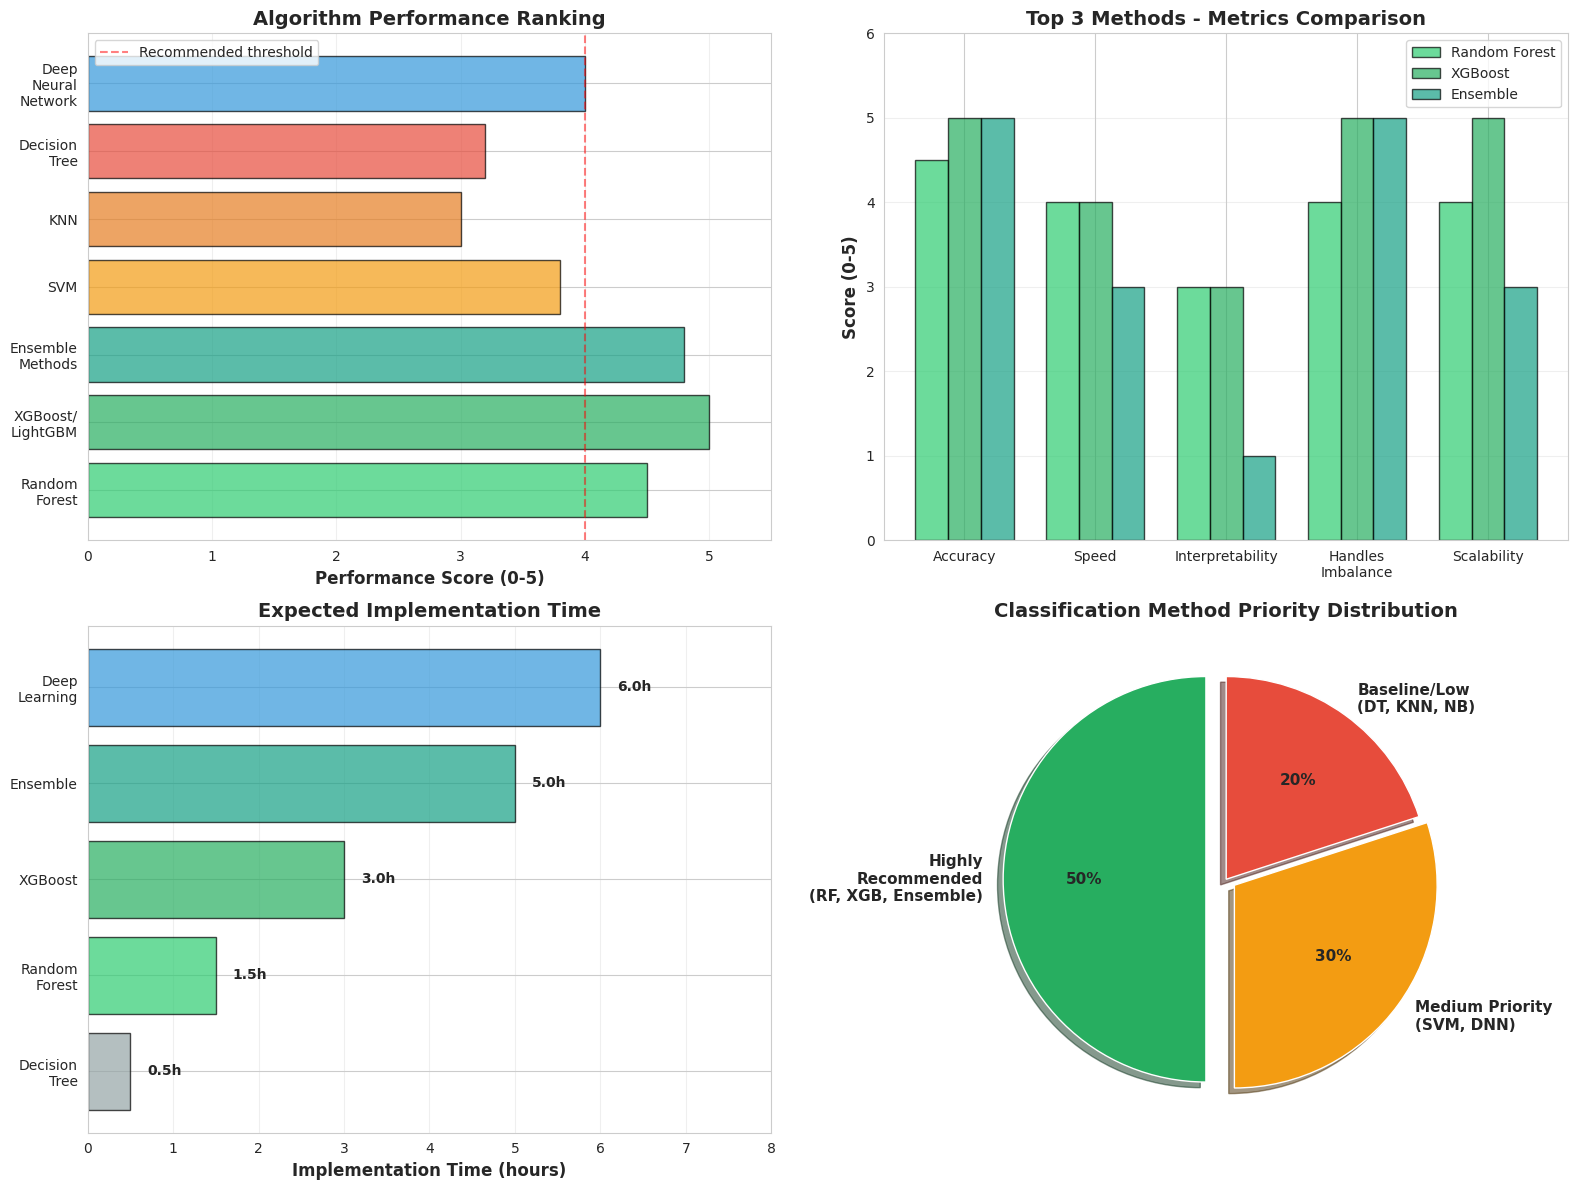


✓ Visual summary saved as: classification_methods_visual_summary.png


In [26]:
# Create visual summary of algorithm recommendations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Algorithm Performance Rating
algorithms = ['Random\nForest', 'XGBoost/\nLightGBM', 'Ensemble\nMethods', 'SVM', 'KNN', 
              'Decision\nTree', 'Deep\nNeural\nNetwork']
performance_scores = [4.5, 5.0, 4.8, 3.8, 3.0, 3.2, 4.0]
colors = ['#2ecc71', '#27ae60', '#16a085', '#f39c12', '#e67e22', '#e74c3c', '#3498db']

axes[0, 0].barh(algorithms, performance_scores, color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Performance Score (0-5)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Algorithm Performance Ranking', fontsize=14, fontweight='bold')
axes[0, 0].set_xlim(0, 5.5)
axes[0, 0].axvline(x=4.0, color='red', linestyle='--', alpha=0.5, label='Recommended threshold')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Key Metrics Comparison
metrics = ['Accuracy', 'Speed', 'Interpretability', 'Handles\nImbalance', 'Scalability']
rf_scores = [4.5, 4.0, 3.0, 4.0, 4.0]
xgb_scores = [5.0, 4.0, 3.0, 5.0, 5.0]
ensemble_scores = [5.0, 3.0, 1.0, 5.0, 3.0]

x = np.arange(len(metrics))
width = 0.25

axes[0, 1].bar(x - width, rf_scores, width, label='Random Forest', color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0, 1].bar(x, xgb_scores, width, label='XGBoost', color='#27ae60', alpha=0.7, edgecolor='black')
axes[0, 1].bar(x + width, ensemble_scores, width, label='Ensemble', color='#16a085', alpha=0.7, edgecolor='black')

axes[0, 1].set_ylabel('Score (0-5)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Top 3 Methods - Metrics Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics, fontsize=10)
axes[0, 1].legend()
axes[0, 1].set_ylim(0, 6)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Implementation Timeline
methods = ['Decision\nTree', 'Random\nForest', 'XGBoost', 'Ensemble', 'Deep\nLearning']
times = [0.5, 1.5, 3.0, 5.0, 6.0]  # in hours
colors_time = ['#95a5a6', '#2ecc71', '#27ae60', '#16a085', '#3498db']

axes[1, 0].barh(methods, times, color=colors_time, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Implementation Time (hours)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Expected Implementation Time', fontsize=14, fontweight='bold')
axes[1, 0].set_xlim(0, 8)
axes[1, 0].grid(axis='x', alpha=0.3)

for i, (method, time) in enumerate(zip(methods, times)):
    axes[1, 0].text(time + 0.2, i, f'{time}h', va='center', fontsize=10, fontweight='bold')

# 4. Recommendation Priority Pie Chart
categories = ['Highly\nRecommended\n(RF, XGB, Ensemble)', 
              'Medium Priority\n(SVM, DNN)', 
              'Baseline/Low\n(DT, KNN, NB)']
sizes = [50, 30, 20]
colors_pie = ['#27ae60', '#f39c12', '#e74c3c']
explode = (0.1, 0.05, 0)

axes[1, 1].pie(sizes, explode=explode, labels=categories, colors=colors_pie, autopct='%1.0f%%',
               shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 1].set_title('Classification Method Priority Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('classification_methods_visual_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visual summary saved as: classification_methods_visual_summary.png")

---

## 📌 Summary & Next Steps

### Key Findings from EDA:
- **Dataset Size**: 257,673 total samples (82,332 training, 175,341 testing)
- **Features**: 44 features (mix of numerical and categorical)
- **Target Variables**: 
  - Binary: Normal (0) vs Attack (1)
  - Multi-class: 10 attack categories
- **Data Quality**: Excellent (no missing values, no duplicates)
- **Class Balance**: Moderate imbalance (55% attacks, 45% normal)

### Top 3 Recommended Methods:
1. **🥇 XGBoost/LightGBM/CatBoost** - Best performance, handles imbalance well
2. **🥈 Random Forest** - Robust, easy to implement, good baseline
3. **🥉 Ensemble Methods** - Highest potential accuracy for production

### Preprocessing Steps Required:
1. Encode categorical features (proto, service, state)
2. Feature scaling for SVM/Neural Networks
3. Handle class imbalance (class_weight or SMOTE)
4. Feature selection based on importance

### Evaluation Focus:
- Prioritize **RECALL** (catching all attacks is critical)
- Monitor F1-Score for balanced performance
- Analyze confusion matrix for error patterns

### Next Actions:
1. Start with Random Forest as baseline
2. Implement XGBoost for best performance
3. Create ensemble model for production
4. Compare all models on test set

**Files Generated:**
- `classification_methods_recommendation_report.txt` - Detailed text report
- `classification_methods_visual_summary.png` - Visual comparison
- `eda_summary_report.txt` - EDA summary